In [64]:
leakage = 0.3
X = tf.Variable([0., 1., -1.])

In [70]:
tf.math.scalar_mul(1-leakage, tf.where(X >= 0, X, tf.zeros_like(X))) + tf.math.scalar_mul(leakage, tf.where(X < 0, X, tf.zeros_like(X)))

<tf.Tensor: id=1039866, shape=(3,), dtype=float32, numpy=array([ 0. ,  0.7, -0.3], dtype=float32)>

In [62]:
tf.where(tf.Variable([0., 1., -1.]) >= 0, tf.zeros_like(tf.Variable([0., 1., -1.])), tf.Variable([0., 1., -1.]))

<tf.Tensor: id=1039745, shape=(3,), dtype=float32, numpy=array([ 0.,  0., -1.], dtype=float32)>

In [3]:
Z.shape

(10, 10)

SGDClassifier:  1.0
LTF:  1.0


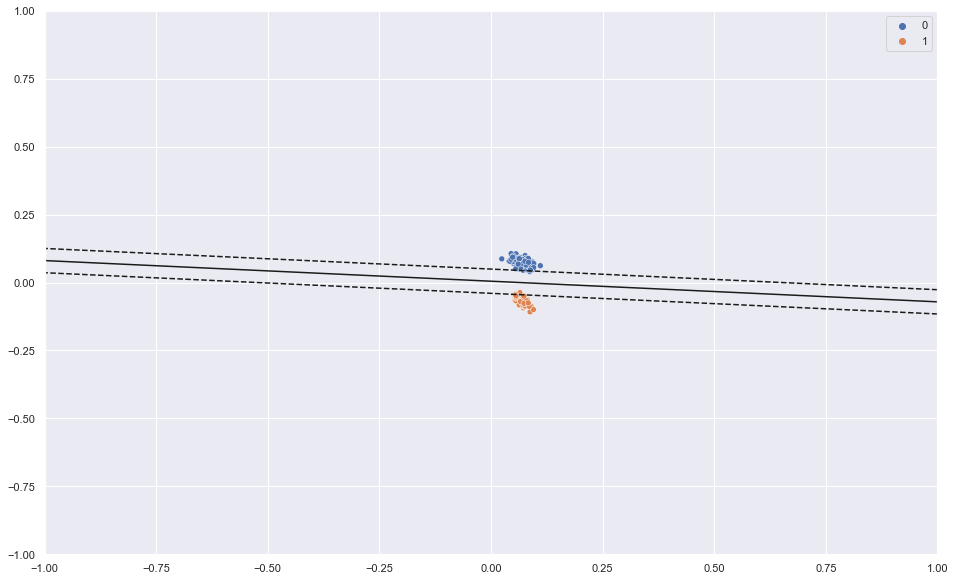

In [1]:
import seaborn as sns; sns.set()
import numpy as np
import umap
from linear_models import *
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy.stats import bernoulli
from scipy.stats import beta
from sklearn import datasets
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

#%load_ext autoreload
#%autoreload 1
#%aimport linear_models

n_samples=200
n_features=2
for i in range(1):
    X, y = datasets.make_classification(n_samples=n_samples, n_features=n_features, n_classes=2, n_informative=2, hypercube=True,
                                        class_sep=5, n_redundant=0, flip_y=0, n_clusters_per_class=1)
    X = normalize(X, norm='l2', axis=0)
    X = X.astype('float32')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2020)
    clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
    clf.fit(X_train, y_train)
    print('SGDClassifier: ',clf.score(X_test,y_test))

    hlf = Halfspace(epochs=1)
    hlf.fit(X_train, y_train)
    print('LTF: ',hlf.score(X_test,y_test))

    #hlfs = Halfspaces(epochs = 5)
    #hlfs.fit(X_train, y_train)
    #print('LTFs with max_thresh: ',hlfs.score(X_test, y_test))
    #print(hlfs.score_per_w(X_test, y_test))
    #print(hlfs.get_trace())

    #hlfs = Halfspaces(epochs = 5, thresh='max_slope')
    #hlfs.fit(X_train, y_train)
    #print('LTFs with max_slope: ',hlfs.score(X_test, y_test))
    #print(hlfs.score_per_w(X_test, y_test))
    #print(hlfs.get_trace())

    # plot the line, the points, and the nearest vectors to the plane
    xx = np.linspace(-1, 1, 10)
    yy = np.linspace(-1, 1, 10)

    X1, X2 = np.meshgrid(xx, yy)
    Z = np.empty(X1.shape)

    for (i, j), val in np.ndenumerate(X1):
        x1 = val
        x2 = X2[i, j]
        p = clf.decision_function([[x1, x2]])
        Z[i, j] = p[0]

    plt.figure(figsize=(16, 10))
    plt.contour(X1, X2, Z, levels = [-1.0, 0.0, 1.0], colors='k', linestyles=['dashed', 'solid', 'dashed'])
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y);

In [6]:
import numpy as np
from linear_models import *
import tensorflow as tf
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split
from data_gen import *



err_SVM = [[],[],[]]
err_bayes_clf = [[],[],[]]
err_hlf = [[],[],[]]
err_hlfs_rmax = [[],[],[]]
err_hlfs_max = [[],[],[]]
err_hlfs_slope = [[],[],[]]
etas = []
gammas = []
epsilons = []


epochs = 1

for i in range(1):
    d = int(100*np.random.uniform(.01,1))
    gamma = np.random.uniform(.05, .2)
    epsilon = np.random.uniform(.05,.1)
    n = int(2*np.log(2/(gamma*epsilon))/(eps**2)) + 1
    eta = 0.49999*np.random.uniform(0,1)
    m = int(2*np.log(2/epsilon)/(gamma**2*eps**2)) + 1 
    
    print('*** ITERATION '+str(i)+' ***')
    print('gamma = ', gamma)
    print('eps = ', epsilon)
    print('n = ', n)
    print('d = ', d)
    print('eta = ', eta)
    print('m = ', m)
    #X, y, model = Datasets.data_margin(n_samples, n_features, gamma)

    #bayes_clf = Halfspace()
    #bayes_clf.set_model(model)

    ## Random Classification Noise (RCN)
    #noisy_y = Datasets.uniform_noise(X, y, eta)
    #X_train, X_test, y_train, y_test = train_test_split(X, noisy_y, test_size=0.33)

    # Bayes classifier
    #err_bayes_clf[0].append(1-bayes_clf.score(X_test, y_test))

    # linear SVM model
    #clf = linear_model.SGDClassifier()
    #clf.fit(X_train, y_train)
    #err_SVM[0].append(1-clf.score(X_test, y_test))

    # Halfspace model
    #hlf = Halfspace(leakage=eta, epochs = epochs)
    #hlf.fit(X_train, y_train)
    #err_hlf[0].append(1-hlf.score(X_test, y_test))


    # Halfspaces model with max rand threshloding routine
    #hlfs = Halfspaces(leakage=eta, frac=m, epochs = epochs)
    #hlfs.fit(X_train, y_train)
    #err_hlfs_rmax[0].append(1-hlfs.score(X_test, y_test))

    # Halfspaces model with sttepest slope threshloding routine
    #hlfs = Halfspaces(leakage=eta, frac=m, thresh='max_slope', epochs = epochs)
    #hlfs.fit(X_train, y_train)
    #err_hlfs_slope[0].append(1-hlfs.score(X_test, y_test))
    

    ## Massart noise model with random prior
    #noisy_y = Datasets.rand_Massart_noise(X, y, eta)
    #X_train, X_test, y_train, y_test = train_test_split(X, noisy_y, test_size=0.33)

    # Bayes classifier
    #err_bayes_clf[1].append(1-bayes_clf.score(X_test, y_test))

    # linear SVM model
    #clf = linear_model.SGDClassifier()
    #clf.fit(X_train, y_train)
    #err_SVM[1].append(1-clf.score(X_test, y_test))

    # Halfspace model
    #hlf = Halfspace(leakage=eta)
    #hlf.fit(X_train, y_train)
    #err_hlf[1].append(1-hlf.score(X_test, y_test))

    # Halfspaces model with max acc threshloding routine
    #hlfs = Halfspaces(leakage=eta, frac=m, epochs = epochs)
    #hlfs.fit(X_train, y_train)
    #err_hlfs_rmax[1].append(1-hlfs.score(X_test, y_test))

    # Halfspaces model with sttepest slope threshloding routine
    #hlfs = Halfspaces(leakage=eta, thresh='max_slope')
    #hlfs.fit(X_train, y_train)
    #err_hlfs_slope[1].append(1-hlfs.score(X_test, y_test))


    ## Massart noise model with prior depending on x
    #noisy_y = Datasets.sig_Massart_noise(X, y, eta)
    #X_train, X_test, y_train, y_test = train_test_split(X, noisy_y, test_size=0.33)

    # Bayes classifier
    #err_bayes_clf[2].append(1-bayes_clf.score(X_test, y_test))

    # linear SVM model
    #clf = linear_model.SGDClassifier()
    #clf.fit(X_train, y_train)
    #err_SVM[2].append(1-clf.score(X_test, y_test))

    # Halfspace model
    #hlf = Halfspace(leakage=eta)
    #hlf.fit(X_train, y_train)
    #err_hlf[2].append(1-hlf.score(X_test, y_test))

    # Halfspaces model with max acc threshloding routine
    #hlfs = Halfspaces(leakage=eta, frac=m, epochs = epochs)
    #hlfs.fit(X_train, y_train)
    #err_hlfs_rmax[2].append(1-hlfs.score(X_test, y_test))

    # Halfspaces model with sttepest slope threshloding routine
    #hlfs = Halfspaces(leakage=eta, thresh='max_slope')
    #hlfs.fit(X_train, y_train)
    #err_hlfs_slope[2].append(1-hlfs.score(X_test, y_test))

    etas.append(eta)
    gammas.append(gamma)
    epsilons.append(eps)

print('eta = ', etas)
print('gamma = ', gammas)
print('eps = ', epsilons)
print('bayes_clf = ', err_bayes_clf)
print('SVM = ', err_SVM)
print('hlf = ', err_hlf)
print('hlfs_rand = ', err_hlfs_rmax)
print('hlfs_slope = ', err_hlfs_slope)

*** ITERATION 0 ***
gamma =  0.19634643561836895
eps =  0.0947211047820692
n =  58376
d =  94
eta =  0.036823545893885964
m =  987265
eta =  [0.036823545893885964]
gamma =  [0.19634643561836895]
eps =  [0.012659677935925654]
bayes_clf =  [[], [], []]
SVM =  [[], [], []]
hlf =  [[], [], []]
hlfs_rand =  [[], [], []]
hlfs_slope =  [[], [], []]


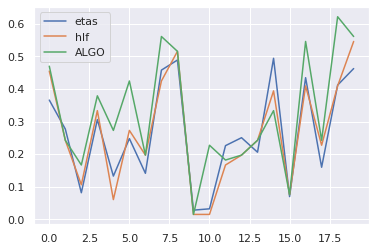

In [25]:
#plt.figure(figsize=(40, 20))
plt.plot(bayes_sim_etas, label='etas')
#plt.plot(err_SVM[0], label='SVM')
plt.plot(err_bayes_clf[0], label='hlf')
plt.plot(err_hlfs_rmax[0], label='ALGO')
plt.legend();

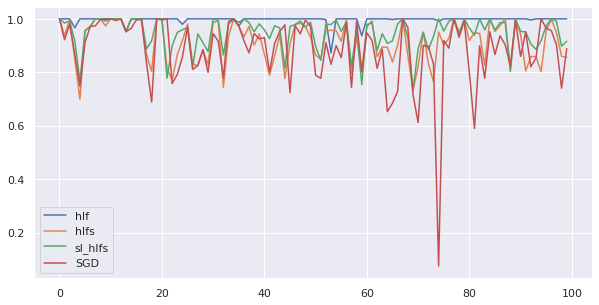

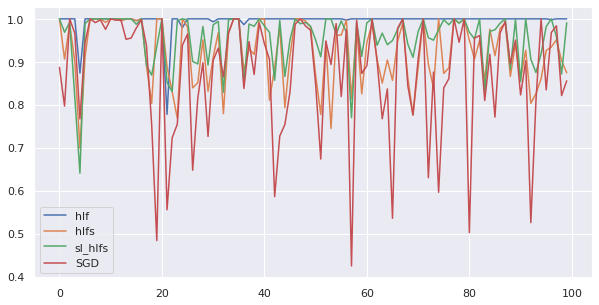

In [42]:
plt.figure(figsize=(10, 5))
plt.plot(rand_hlf, label='hlf')
plt.plot(rand_hlfs, label='hlfs')
plt.plot(rand_sl_hlfs, label='sl_hlfs')
plt.plot(rand_SGD, label='SGD')
plt.legend();

plt.figure(figsize=(10, 5))
plt.plot(sig_hlf, label='hlf')
plt.plot(sig_hlfs, label='hlfs')
plt.plot(sig_sl_hlfs, label='sl_hlfs')
plt.plot(sig_SGD, label='SGD')
plt.legend();

In [1]:
import seaborn as sns; sns.set()
import numpy as np
import umap
from linear_models import *
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split
from data_gen import *

margin=0.2

X, y, model = Datasets.data_margin(100, 2, margin)    
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
xx = np.linspace(-1, 1, 10)
yy = np.array([model.f(xx[i]) for i in range(10)])
plt.plot(xx,yy)
plt.plot(xx,yy+margin, '--')
plt.plot(xx,yy-margin, '--');

In [2]:
Datasets.mixed_noise(X, y , .1)

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0])

# Simulations

In [48]:
from data_gen import *

size = '100'
noise_model = 'SMN'
etas = np.array(Datasets.load_obj(noise_model+'_etas_'+size))
gammas = np.array(Datasets.load_obj(noise_model+'_gammas_'+size))
epsilons = np.array(Datasets.load_obj(noise_model+'_epsilons_'+size))
err_bayes_clf = np.array(Datasets.load_obj(noise_model+'_err_bayes_clf_'+size))
err_SVM = np.array(Datasets.load_obj(noise_model+'_err_SVM_'+size))
err_hlf = np.array(Datasets.load_obj(noise_model+'_err_hlf_'+size))
err_hlfs = np.array(Datasets.load_obj(noise_model+'_err_hlfs_'+size))
born_rate = [np.sum(err_bayes_clf <= etas + epsilons) / len(etas), np.sum(err_SVM <= etas + epsilons) / len(etas), 
             np.sum(err_hlf <= etas + epsilons) / len(etas), np.sum(err_hlfs <= etas + epsilons) / len(etas)]

models = ['Bayes_classif', 'SVM', 'halfspace', 'halfspaces_list']

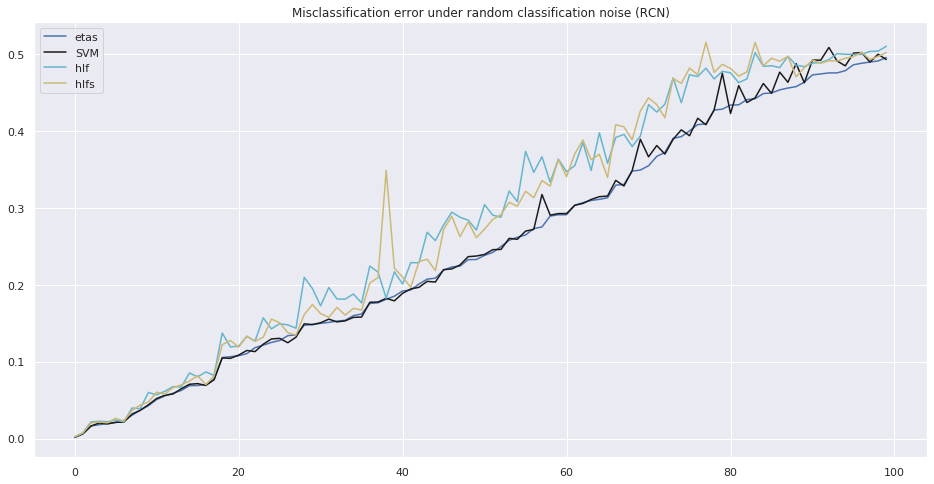

In [45]:
plt.figure(figsize=(16, 8))
plt.plot(sorted(etas), label='etas', c='b')
plt.plot([x for _,x in sorted(zip(etas,err_SVM))], label='SVM', c='k')
plt.plot([x for _,x in sorted(zip(etas,err_hlf))], label='hlf', c='c')
plt.plot([x for _,x in sorted(zip(etas,err_hlfs))], label='hlfs', c='y')
plt.title('Misclassification error under random classification noise (RCN)')
plt.legend();
#plt.savefig('../pics/sup_RCN.png')

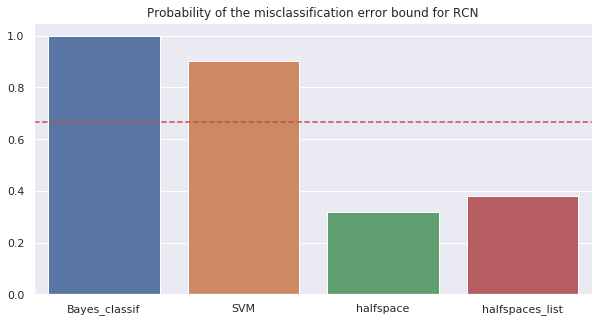

In [35]:
plt.figure(figsize=(10, 5))
g = sns.barplot(models, born_rate)
g.set_title('Probability of the misclassification error bound for RCN')
g.axhline(2/3, color='r', ls='--');

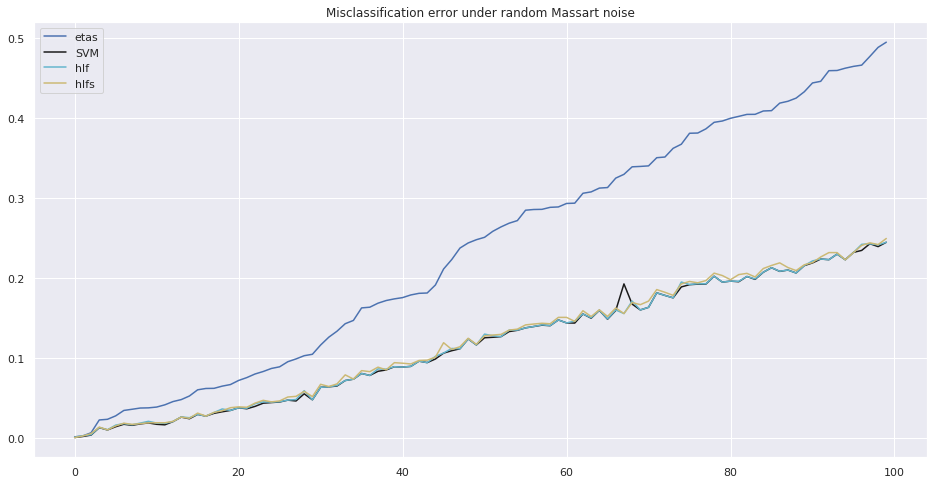

In [47]:
plt.figure(figsize=(16, 8))
plt.plot(sorted(etas), label='etas', c='b')
plt.plot([x for _,x in sorted(zip(etas,err_SVM))], label='SVM', c='k')
plt.plot([x for _,x in sorted(zip(etas,err_hlf))], label='hlf', c='c')
plt.plot([x for _,x in sorted(zip(etas,err_hlfs))], label='hlfs', c='y')
plt.title('Misclassification error under random Massart noise')
plt.legend();
#plt.savefig('../pics/sup_RMN.png')

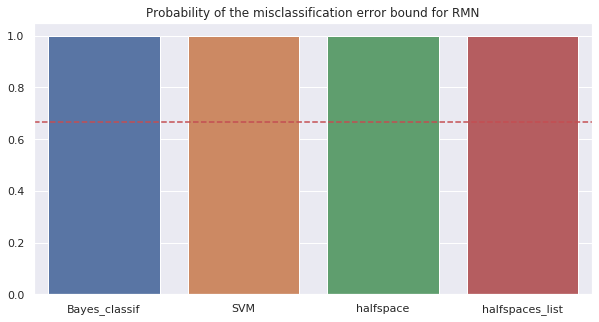

In [39]:
plt.figure(figsize=(10, 5))
g = sns.barplot(models, born_rate)
g.set_title('Probability of the misclassification error bound for RMN')
g.axhline(2/3, color='r', ls='--');

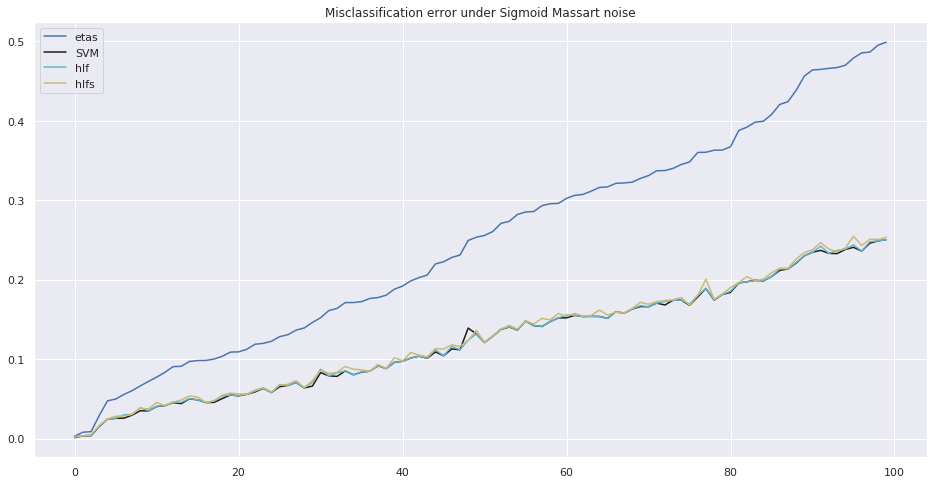

In [49]:
plt.figure(figsize=(16, 8))
plt.plot(sorted(etas), label='etas', c='b')
plt.plot([x for _,x in sorted(zip(etas,err_SVM))], label='SVM', c='k')
plt.plot([x for _,x in sorted(zip(etas,err_hlf))], label='hlf', c='c')
plt.plot([x for _,x in sorted(zip(etas,err_hlfs))], label='hlfs', c='y')
plt.title('Misclassification error under Sigmoid Massart noise')
plt.legend();
#plt.savefig('../pics/sup_RMN.png')

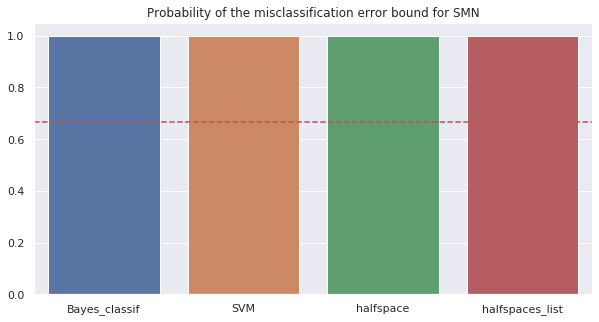

In [42]:
plt.figure(figsize=(10, 5))
g = sns.barplot(models, born_rate)
g.set_title('Probability of the misclassification error bound for SMN')
g.axhline(2/3, color='r', ls='--');

# Semi Supervised Case

In [112]:
etas = Datasets.load_obj('ssl_etas_100_20_600')
err_SVM = Datasets.load_obj('ssl_err_SVM_100_20_600')
err_hlf = Datasets.load_obj('ssl_err_hlf_100_20_600')
err_hlfs = Datasets.load_obj('ssl_err_hlfs_100_20_600')

In [120]:
# R(h) <= eta (computed on training samples)
sum(np.array(err_hlfs[0]) <= np.array(etas[2]))/100, sum(np.array(err_hlfs[1]) <= np.array(etas[2]))/100

(0.47, 0.52)

In [122]:
# R(h) <= eta (computed on training samples)
sum(np.array(err_hlf[0]) <= np.array(etas[1]))/100, sum(np.array(err_hlf[1]) <= np.array(etas[1]))/100

(0.5, 0.64)

In [123]:
# R(h) <= eta (computed on training samples)
sum(np.array(err_SVM[0]) <= np.array(etas[0]))/100, sum(np.array(err_SVM[1]) <= np.array(etas[0]))/100

(0.66, 0.65)

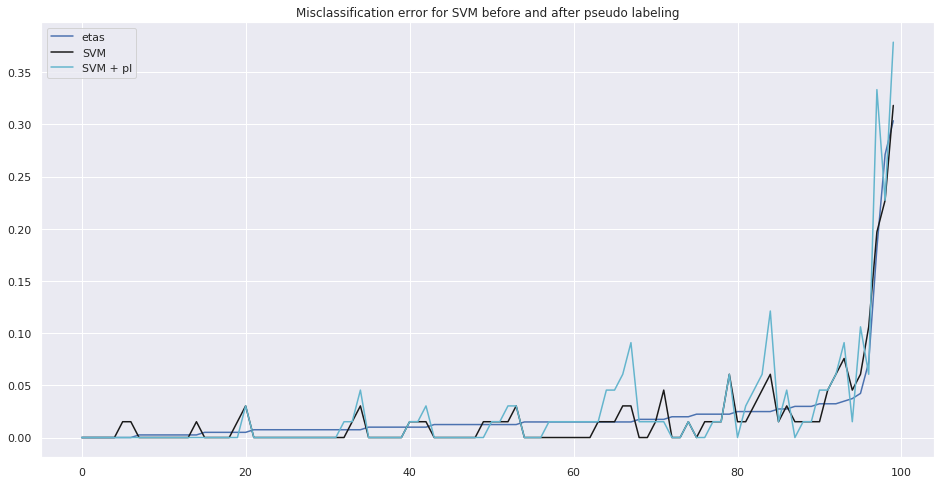

In [130]:
plt.figure(figsize=(16, 8))
plt.plot(sorted(etas[0]), label='etas', c='b')
plt.plot([x for _,x in sorted(zip(etas[0], err_SVM[0]))], label='SVM', c='k')
plt.plot([x for _,x in sorted(zip(etas[0], err_SVM[1]))], label='SVM + pl', c='c')
plt.title('Misclassification error for SVM before and after pseudo labeling')
plt.legend()
plt.savefig('../pics/ssl_svm.png')